In [323]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Data Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Model
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

# Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# Imputation (Fill Null Value)
from sklearn.impute import SimpleImputer

In [324]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_row, train_col = train.shape
test_row, test_col = test.shape


df = pd.concat([train, test])

<Axes: >

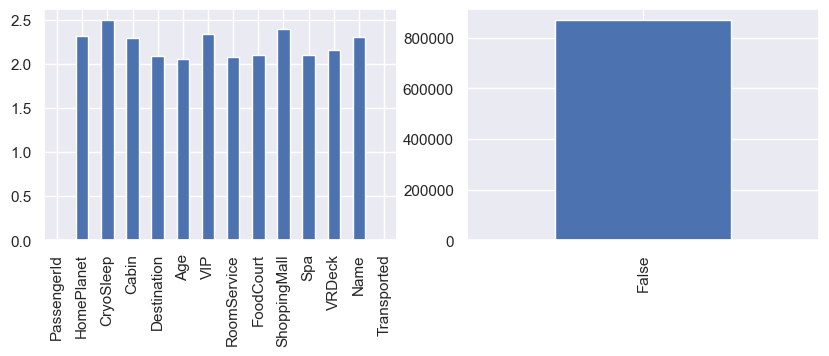

In [325]:
plt.figure( figsize=(10,3))
sns.set()

plt.subplot(1,2,1)
( ( train.isnull().sum() / len(train) ) * 100).plot( kind = 'bar')

plt.subplot(1,2,2)
( (train.duplicated().value_counts()  ) * 100).plot( kind = 'bar')

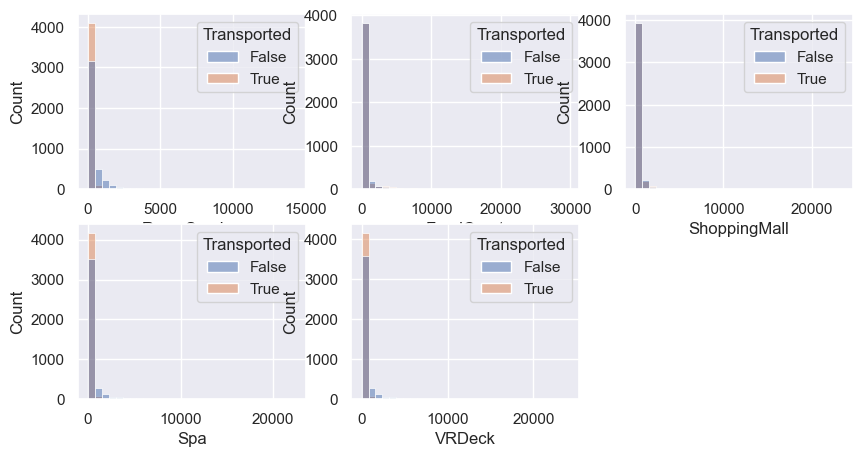

In [326]:
nth = 1 
plt.figure( figsize = (10,5))
for columns in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    plt.subplot( 2 , 3 , nth)
    nth = nth +1 
    sns.histplot( x = columns , hue = "Transported" , data  = train , bins = 30  )
    

In [327]:
numeric_columns  =  []
for column in df.columns:
   if df[column].dtype == "float64":
    numeric_columns.append( column )

imputer = SimpleImputer( strategy = "median")
df[ numeric_columns ] =  imputer.fit_transform( df[ numeric_columns ])

<Axes: xlabel='CryoSleep', ylabel='count'>

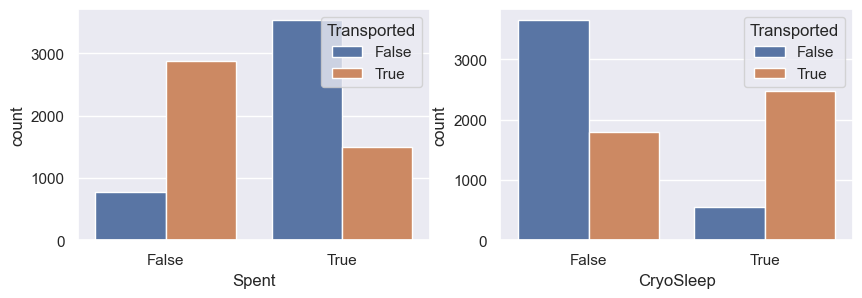

In [328]:
plt.figure( figsize = (10,3))

#Create a boolean Colum "Spent" . True if spend , Flase OtherWise 
df["Spent"] = df[["RoomService", "FoodCourt","ShoppingMall", "Spa", "VRDeck"]].sum(axis=1) > 0


plt.subplot(1,2,1)
sns.countplot( x = "Spent" , hue = "Transported" , data = df.iloc[:train_row])


plt.subplot(1,2,2)
sns.countplot( x= "CryoSleep" , hue = "Transported" , data= df.iloc[:train_row])





# df.drop(["RoomService", "FoodCourt", "ShoppingMall","Spa", "VRDeck"], axis=1, inplace=True)

# Age Column ( Categorize and Imputation )


<Axes: xlabel='Age'>

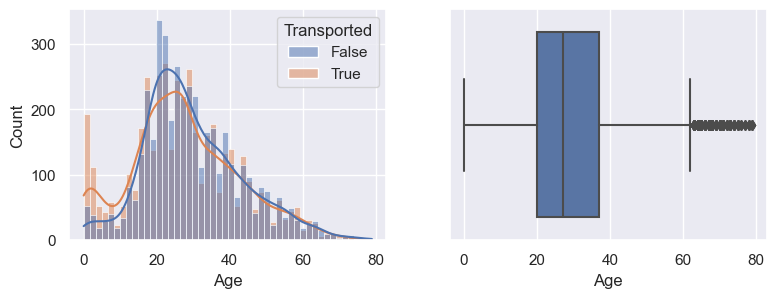

In [329]:
fig , axes = plt.subplots( 1 , 2 , figsize = (9,3))
sns.histplot(ax= axes[0] ,x="Age", hue="Transported" , data = df.iloc[:train_row] , kde = True )
sns.boxplot(ax = axes[1] ,x="Age" , data = df.iloc[:train_row] )

In [330]:
def categorize_age(age):
    if age >= 0 and age <= 10:
        return "0-10"
    elif age > 10 and age <= 20:
        return "10-20"
    elif age > 20 and age <= 30:
        return "20-30"
    elif age > 30 and age <= 40:
        return "30-40"
    elif age > 40 and age <= 50:
        return "40-50"
    elif age > 50 and age <= 60:
        return "50-60"
    elif age > 60 and age <= 70:
        return "60-70"
    else:
        return "Outlier"

############# Categorize AGE
df["Age_Category"] = df["Age"].apply(categorize_age)
df.drop("Age", inplace=True, axis=1)




<Axes: xlabel='Age_Category', ylabel='count'>

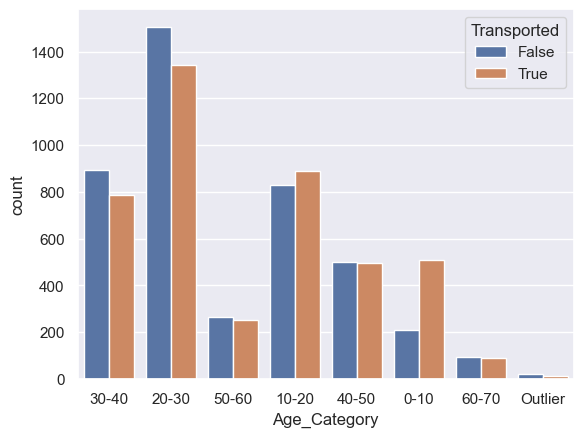

In [331]:
sns.countplot( x = "Age_Category" , hue = "Transported" , data = df.iloc[:train_row])

# Cabin ( Deck / Num / Side )


In [332]:
df[ [ "Deck","Num","Side"] ] = df["Cabin"].str.split("/", expand=True)
df.drop(["Num","Cabin"] , axis = 1 , inplace = True)

In [333]:
df[ ["Group_No", "Passenger_No"]] = df["PassengerId"].str.split("_" , expand = True)
df.drop("PassengerId" , axis=1 , inplace = True)

<Axes: xlabel='Passenger_No', ylabel='count'>

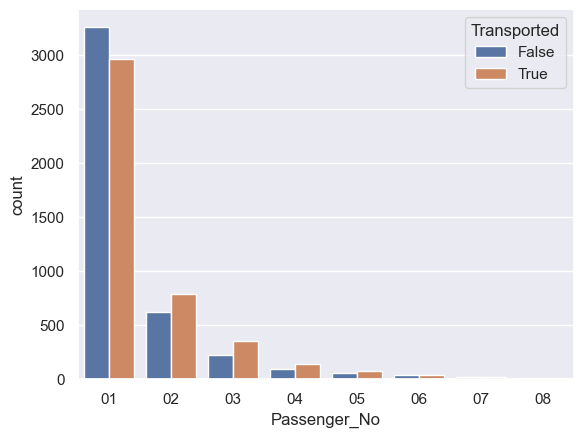

In [334]:
sns.countplot( x =  "Passenger_No" , hue =  "Transported" , data = df.iloc[:train_row])

In [335]:
df["Group_Size"] = df.groupby("Group_No")["Name"].transform("count")
df.drop("Group_No", axis = 1 , inplace = True)

<Axes: xlabel='Group_Size', ylabel='count'>

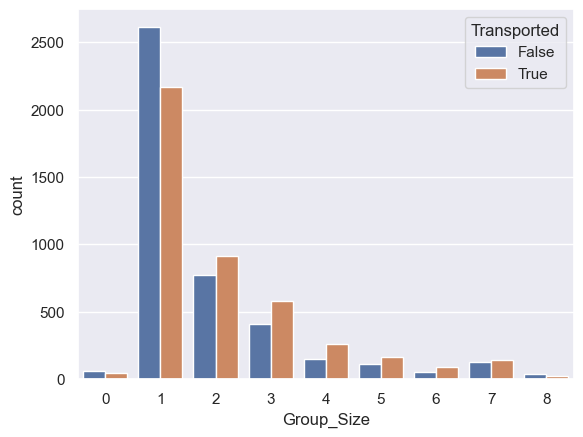

In [336]:
sns.countplot( x = "Group_Size", hue = "Transported" , data = df.iloc[:train_row])

In [337]:
df.drop("Name",axis = 1 , inplace = True)
df.fillna( method = 'ffill', inplace = True)

In [338]:
df["Passenger_No"] = df["Passenger_No"].astype("int64")

In [339]:
train = df[:train_row].copy()
train.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Spent,Age_Category,Deck,Side,Passenger_No,Group_Size
0,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,False,False,30-40,B,P,1,1
1,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,True,True,20-30,F,S,1,1
2,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,False,True,50-60,A,S,1,2
3,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,False,True,30-40,A,S,2,2
4,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,True,True,10-20,F,S,1,1


In [340]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

X = train.drop(["Transported"], axis=1)
X_submission = df.iloc[train_row:].drop( ["Transported"], axis=1)

# encoder = OrdinalEncoder()
# column_names = X.columns
# X = pd.DataFrame(encoder.fit_transform(X), columns=column_names)

for column in X.columns:
    if X[column].dtype  not in  ["int64","float64"] :
        print("Column Name:" , column)
        encoder = LabelEncoder()
        X[column] =  encoder.fit_transform( X[column] )
        X_submission[column] = encoder.transform( X_submission[column])

y = train["Transported"]
le = LabelEncoder()
y = le.fit_transform(y)
X

Column Name: HomePlanet
Column Name: CryoSleep
Column Name: Destination
Column Name: VIP
Column Name: Spent
Column Name: Age_Category
Column Name: Deck
Column Name: Side


,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Spent,Age_Category,Deck,Side,Passenger_No,Group_Size
0,1,0,2,0,0.0,0.0,0.0,0.0,0.0,0,3,1,0,1,1
1,0,0,2,0,109.0,9.0,25.0,549.0,44.0,1,2,5,1,1,1
2,1,0,2,1,43.0,3576.0,0.0,6715.0,49.0,1,5,0,1,1,2
3,1,0,2,0,0.0,1283.0,371.0,3329.0,193.0,1,3,0,1,2,2
4,0,0,2,0,303.0,70.0,151.0,565.0,2.0,1,1,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,1,0.0,6819.0,0.0,1643.0,74.0,1,4,0,0,1,1
8689,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0,1,6,1,1,1
8690,0,0,2,0,0.0,0.0,1872.0,1.0,0.0,1,2,6,1,1,1
8691,1,0,0,0,0.0,1049.0,0.0,353.0,3235.0,1,3,4,1,1,2


In [341]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [342]:
# from sklearn.model_selection import GridSearchCV
# parameters = { "n_estimators":[500,750,1000,1300] ,
#              "learning_rate" : [ 0.001 , 0.1 , 0.5 ,1 ] , 
#              "max_depth":[5,7,10] }

# clf = GridSearchCV( GradientBoostingClassifier() , parameters ,  n_jobs = 4 , verbose = 4 , cv = 2)

# clf.fit(X_train , y_train)


In [343]:
# # Results of Grid Search ( Comment out these lines below to find
##                             out the best parameters found by Applying Grid Search)
# best_params = clf.best_params_
# best_score = clf.best_score_ 
# print(best_params)
# print(best_score)

In [361]:

best_params={'learning_rate': 0.020233442882782587, 'max_depth': 4,
            'n_estimators': 469, 'subsample': 0.746529796772373}

In [371]:
### XGBoost
best_params_1={'learning_rate': 0.01, 'max_depth': 4,
            'n_estimators': 500 , 'subsample': 0.3}

xgb = GradientBoostingClassifier(**best_params_1).fit(X_train, y_train)
xgb.score(X_test, y_test)*100

77.816091954023

In [347]:
## This Predictor will run 27 different Predictors and print them their accuracy , f1 score and others
## This can be helpful for model selection

# from lazypredict.Supervised import LazyClassifier
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)
# models

In [348]:
import lightgbm as lgb
gbtree = lgb.LGBMClassifier(learning_rate=0.1, n_estimators=35, num_leaves= 9, max_depth=10, 
                            objective = 'binary', is_unbalance = 'false', random_state=14 , n_jobs = 2)
gbtree.fit(X_train, y_train)
accuracy_score(y_test , gbtree.predict( X_test ) ) * 100 

[LightGBM] [Info] Number of positive: 3951, number of negative: 3872
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 7823, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505049 -> initscore=0.020198
[LightGBM] [Info] Start training from score 0.020198


77.816091954023

In [349]:
meta_train = pd.DataFrame(
        {
            ""
            
            
        }
)

In [350]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( max_depth=2, random_state=0 )
rf.fit( X_train , y_train)
rf.score( X_test ,y_test) * 100

73.5632183908046

In [351]:
# X_submission = df.iloc[train_row:].drop( ["Transported"], axis=1)

# X_submission_columns =  X_submission.columns
# X_submission = pd.DataFrame(encoder.transform( X_submission ) , columns = X_submission_columns)
X_submission

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Spent,Age_Category,Deck,Side,Passenger_No,Group_Size
0,0,1,2,0,0.0,0.0,0.0,0.0,0.0,0,2,6,1,1,1
1,0,0,2,0,0.0,9.0,0.0,2823.0,0.0,1,1,5,1,1,1
2,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0,3,2,1,1,1
3,1,0,2,0,0.0,6652.0,0.0,181.0,585.0,1,3,2,1,1,1
4,0,0,2,0,10.0,0.0,635.0,0.0,0.0,1,1,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,0,0.0,0.0,0.0,0.0,0.0,0,3,6,1,2,2
4273,0,0,2,0,0.0,847.0,17.0,10.0,144.0,1,4,6,1,1,1
4274,2,1,0,0,0.0,0.0,0.0,0.0,0.0,0,2,3,0,1,1
4275,1,0,0,0,0.0,2680.0,0.0,0.0,523.0,1,2,3,0,1,1


In [372]:
predictions  = ( xgb.predict( X_submission ) == 1 )
passengerId = test["PassengerId"]

sample_submission =  pd.DataFrame( {
    "PassengerId":passengerId,
    "Transported":predictions 
})


sample_submission.to_csv("13_1(4).csv" ,index = False)
sample_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
